# GPU check

In [ ]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# # if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
print(gpu_info)

# Import libraries

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import (
    Input,
    Flatten,
    Dense,
    Dropout,
    Permute,
    Reshape,
    GlobalAveragePooling2D,
    AveragePooling2D,
    BatchNormalization,
    Activation,
)
from tensorflow.keras.models import Model
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import cv2
from PIL import Image

# Declare CONST variables

In [ ]:
MODEL_NAME = "inception"
CASE_NAME = "rice"
path_folder = "/content/drive/MyDrive/Inception"
path_train_set = "/content/drive/MyDrive/Rice Leafs/RiceLeafs/train"
path_test_set = "/content/drive/MyDrive/Rice Leafs/RiceLeafs/validation"
black_and_white_train_path = "/content/drive/MyDrive/Rice Leafs/RiceLeafs/black_and_white_train"
black_and_white_test_path = "/content/drive/MyDrive/Rice Leafs/RiceLeafs/black_and_white_test"
background_removal_train_path = "/content/drive/MyDrive/Rice Leafs/RiceLeafs/background_removal_train"
background_removal_test_path = "/content/drive/MyDrive/Rice Leafs/RiceLeafs/background_removal_test"

# Create folders

In [ ]:
if not os.path.isdir(os.path.join(path_folder + "/model", CASE_NAME + "/" + MODEL_NAME)):
    os.makedirs(os.path.join(path_folder + "/model", CASE_NAME + "/" + MODEL_NAME))
totalTrain = len(list(paths.list_images(path_train_set)))
totalVal = len(list(paths.list_images(path_test_set)))

In [ ]:
if not os.path.isdir("/content/drive/MyDrive/Rice Leafs/RiceLeafs/background_removal_test"):
  os.makedirs("/content/drive/MyDrive/Rice Leafs/RiceLeafs/background_removal_test")
if not os.path.isdir("/content/drive/MyDrive/Rice Leafs/RiceLeafs/background_removal_train"):
  os.makedirs("/content/drive/MyDrive/Rice Leafs/RiceLeafs/background_removal_train")
if not os.path.isdir("/content/drive/MyDrive/Rice Leafs/RiceLeafs/black_and_white_train"):
  os.makedirs("/content/drive/MyDrive/Rice Leafs/RiceLeafs/black_and_white_train")
if not os.path.isdir("/content/drive/MyDrive/Rice Leafs/RiceLeafs/black_and_white_test"):
  os.makedirs("/content/drive/MyDrive/Rice Leafs/RiceLeafs/black_and_white_test")

# Image preprocessing

RGB images -> Black and white images

In [ ]:
for dir in os.listdir(path_train_set):
  for image in os.listdir(os.path.join(path_train_set, dir)):
    image_path = os.path.join(path_train_set+"/"+dir, image)
    print(image_path)
    des_path = os.path.join(black_and_white_train_path, image)
    original_img = cv2.imread(image_path)
    grey_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    ret, thresholded_img = cv2.threshold(grey_img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    cv2.imwrite(des_path, thresholded_img)   
    break
  break

/content/drive/MyDrive/Rice Leafs/RiceLeafs/train/Hispa/IMG_20190419_131420.jpg


In [ ]:
from PIL import Image
minw = 0
minh = 0
l = ""
x = []
y = []
z = []

for dir in os.listdir(path_test_set):
  for image in os.listdir(os.path.join(path_test_set, dir)):
    # get the image height & width
    image_location = os.path.join(path_test_set+"/"+dir, image)
    im = Image.open(image_location)
    data = im.size
    # if the width is lower than the last image, we have a new "winner"
    w, h = data[0], data[1]
    if(w in x and h in y and x.index(w) == y.index(h)):
      z[x.index(w)] +=1
    else:
      x.append(w)
      y.append(h)
      z.append(1)
    if w > minw and h > minh:
      minw = w
      minh = h
      l = image_location
# finally, print the values and corresponding files
print("weight", x)
print("height", y)
print("intensity", z)
print(minw, minh, l)

weight [1470, 1585, 1350, 1122, 1382, 2167, 1320, 1344, 2262, 1319, 1233, 1203, 1566, 1188, 1737, 1405, 1258, 1121, 1397, 1696, 1436, 1780, 2094, 1209, 1730, 1337, 1472, 1627, 1059, 1475, 1157, 2021, 1117, 2690, 1439, 1738, 1752, 1946, 1637, 1819, 1664, 1194, 2557, 1891, 1073, 1677, 1812, 1685, 1931, 1944, 1328, 2085, 1936, 1784, 1861, 1788, 1574, 2174, 1776, 1590, 1726, 1708, 1853, 2104, 1688, 2061, 1629, 2145, 1975, 1948, 2178, 2828, 1716, 1922, 3120, 2185, 2413, 2181, 2370, 1663, 1384, 1741, 1828, 1353, 1647, 2152, 1498, 1361, 1342, 2007, 1293, 1345, 1523, 1356, 1680, 1654, 1859, 1758, 1763, 1425, 1110, 1609, 2099, 2176, 1854, 1806, 1829, 2049, 1555, 1927, 1531, 1694, 2014, 1348, 1099, 1897, 1424, 1489, 1639, 1761, 2095, 1937, 1732, 1407, 1932, 2057, 2054, 2244, 1422, 2084, 2015, 1697, 2216, 1683, 2164, 2136, 1755, 2312, 2045, 1835, 2831, 1363, 1764, 2055, 1892, 1740, 1830, 1550, 1846, 2398, 2414, 1838, 2202, 2253, 1858, 2114, 1724, 2272, 1847, 2332, 2363, 2065, 2017, 2048, 1526, 17

In [ ]:
len(x) == len(z)

True

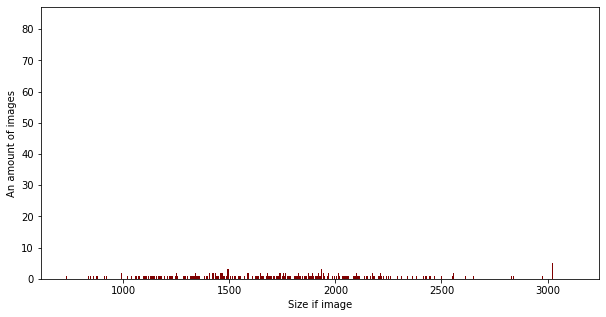

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, z, color ='maroon',width = 3)
 
plt.xlabel("Size if image")
plt.ylabel("An amount of images")
plt.show()

Text(0.5, 0, 'z axis')

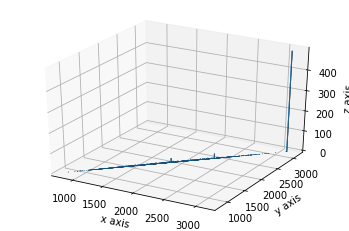

In [ ]:
x = np.array(x)
y = np.array(y)
z = np.array(z)

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

z3 = np.zeros(np.size(z))

dx = np.ones(np.size(z)) + 10
dy = np.ones(np.size(z)) + 10

ax1.bar3d(x, y, z3, dx, dy, z)


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

# Data Augmentation Input

In [ ]:
trainAug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)
valAug = ImageDataGenerator()

mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

batchSize = 64

train_genarator = trainAug.flow_from_directory(
    path_train_set,
    class_mode="categorical",
    target_size=(300, 300),
    color_mode="rgb",
    shuffle=True,
    batch_size=batchSize,
)

label_map = train_genarator.class_indices
print(label_map)

# my_class_weights = class_weight.compute_class_weight(
#     "balanced", np.unique(train_genarator.classes), train_genarator.classes
# )

# my_class_weights = {l: c for l, c in zip(np.unique(train_genarator.classes), my_class_weights)}

# print(my_class_weights)

validation_genarator = valAug.flow_from_directory(
    path_test_set,
    class_mode="categorical",
    target_size=(300, 300),
    color_mode="rgb",
    shuffle=False,
    batch_size=batchSize,
)

Found 2684 images belonging to 4 classes.
{'BrownSpot': 0, 'Healthy': 1, 'Hispa': 2, 'LeafBlast': 3}
Found 671 images belonging to 4 classes.


# Model Inception V3

In [ ]:
#Model
model_raw = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=Input(shape=(300, 300, 3)),
)

headModel = model_raw.output

feed_x = GlobalAveragePooling2D()(headModel)
feed_x = BatchNormalization()(feed_x)
feed_x = Dropout(0.5)(feed_x)
feed_x = Dense(1024, activation="relu")(feed_x)
feed_x = Dense(512, activation="relu")(feed_x)
feed_x = BatchNormalization()(feed_x)
feed_x = Dropout(0.5)(feed_x)

preds = Dense(4, activation="softmax")(feed_x)  # FC-layer

model = Model(inputs=model_raw.input, outputs=preds)

# train only head
for layer in model_raw.layers:
    layer.trainable = False

model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
print("[INFO] compiling model...")
opt = Adam()

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpointer = ModelCheckpoint(
    monitor="val_accuracy",
    filepath=os.path.join(
        os.path.join(path_folder + "/model", CASE_NAME + "/" + MODEL_NAME), CASE_NAME + "300x300" + "_prebest.h5"
    ),
    verbose=1,
    save_best_only=True,
)

reduce_LR = ReduceLROnPlateau(
    monitor="val_accuracy", factor=0.5, patience=5, verbose=1, min_lr=1e-3
)
earlystop = EarlyStopping(monitor="accuracy", patience=10)
csv_logger = CSVLogger(
    path_folder + "/model/" + CASE_NAME + "/" + MODEL_NAME + "300x300" + "_head.csv", append=True
)

#load weights
model.load_weights('/content/drive/MyDrive/Inception/model/rice/inception/rice300x300_prebest.h5')

# print("[INFO] training head...")
# H = model.fit(
#     x = train_genarator,
#     steps_per_epoch=totalTrain // batchSize,
#     validation_data = validation_genarator,
#     validation_steps=totalVal // batchSize,
#     epochs=50,
#     callbacks=[checkpointer, csv_logger, reduce_LR],
# )

# print("[INFO] serializing network...")
# model.save(path_folder + "/model/" + CASE_NAME + "/" + MODEL_NAME + "3120x3120" + "_pre", save_format="h5")

[INFO] compiling model...
